<div style="color: red;"> Damien TANNEAU, e1801969, M1 IM, 2022-2023</div>

# Librairies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.layers import Dropout
from keras.optimizers import Adam

2023-05-25 23:50:40.139238: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 23:50:40.318983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 23:50:40.320189: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 23:50:41.090006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Imports des données

Plusieurs problèmes sont à corriger dans les données avant de remplacer les valeurs manquantes.

In [2]:
pd.read_excel("vente_pneus.xlsx").head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
5,NaN,1,8.0,9.0,10.0,12.0,16.0,9.0
6,NaN,2,10.0,11.0,12.0,14.0,18.0,11.0
7,NaN,3,12.0,13.0,14.0,16.0,20.0,13.0
8,NaN,4,19.0,20.0,20.0,23.0,27.0,19.0
9,NaN,5,23.0,22.0,22.0,27.0,31.0,21.0


Le premier problème est que le tableau de données ne commence pas en [A, 1], mais en [B, 6].

In [3]:
pd.read_excel("vente_pneus.xlsx").tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
54,NaN,50,6.0,7.0,12.0,10.0,14.0,0.0
55,NaN,51,7.0,8.0,13.0,11.0,15.0,0.0
56,NaN,52,4.0,5.0,10.0,8.0,12.0,0.0
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,Somme,1055.0,1216.0,1289.0,1304.0,1512.0,1011.0


Le second problème est qu'une ligne somme est glissée deux lignes sous la dernière ligne du tableau.

On va régler ces problèmes avec des opérations assez communes en manipulation de données.

In [4]:
df = pd.read_excel("vente_pneus.xlsx", skiprows=5).iloc[:-2, 2:]
df.head()

,2017,2018,2019,2020,2021,2022
0,8.0,9.0,10.0,12.0,16.0,9.0
1,10.0,11.0,12.0,14.0,18.0,11.0
2,12.0,13.0,14.0,16.0,20.0,13.0
3,19.0,20.0,20.0,23.0,27.0,19.0
4,23.0,22.0,22.0,27.0,31.0,21.0


In [5]:
df.tail()

,2017,2018,2019,2020,2021,2022
47,24.0,25.0,29.0,28.0,32.0,0.0
48,12.0,13.0,15.0,16.0,20.0,0.0
49,6.0,7.0,12.0,10.0,14.0,0.0
50,7.0,8.0,13.0,11.0,15.0,0.0
51,4.0,5.0,10.0,8.0,12.0,0.0


La première case du tableau correspond maintenant bien à la première entrée des données. La ligne concernant la somme est bien omise. 

Nos 2 problèmes sont résolus.

# Analyse des données

Chercons à présent à en savoir plus sur les données.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2017    52 non-null     float64
 1   2018    52 non-null     float64
 2   2019    52 non-null     float64
 3   2020    52 non-null     float64
 4   2021    52 non-null     float64
 5   2022    52 non-null     float64
dtypes: float64(6)
memory usage: 2.6 KB


Toutes numériques, on en compte 52 par colonne. 

(52... comme le nombre de semaines d'une année ?!)

Dressons-en quelques statistiques simples pour mieux les cerner.

In [7]:
basic_stats = df.describe()
basic_stats

,2017,2018,2019,2020,2021,2022
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.288462,23.384615,22.576923,22.730769,26.557692,19.442308
std,17.015952,16.003865,16.284657,16.620464,17.128595,20.946630
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,9.000000,9.750000,10.000000,14.000000,0.000000
50%,13.000000,22.500000,19.500000,17.500000,22.500000,12.000000
75%,36.000000,37.000000,35.750000,37.000000,37.250000,37.250000
max,56.000000,53.000000,53.000000,55.000000,64.000000,66.000000


On peut représenter les ventes par année malgré les valeurs manquantes.

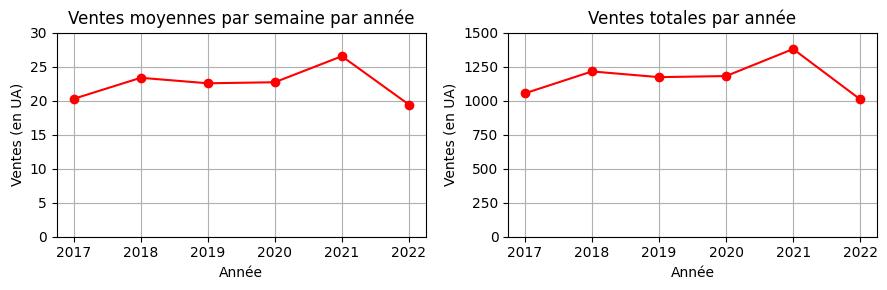

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

axes[0].plot(basic_stats.loc["mean"], 'r-o')
axes[0].set_ylim(0, 30)
axes[0].set_xlabel('Année')
axes[0].set_ylabel('Ventes (en UA)')
axes[0].set_title('Ventes moyennes par semaine par année')
axes[0].grid()

axes[1].plot(df.sum(), 'r-o')
axes[1].set_ylim(0, 1500)
axes[1].set_xlabel('Année')
axes[1].set_ylabel('Ventes (en UA)')
axes[1].set_title('Ventes totales par année')
axes[1].grid()

plt.tight_layout()
plt.savefig("tg.png")
plt.show()

# Traitement des données

S'il s'agit bien de semaines, c'est pertinent de rapporter les données à une série temporelle.

En ayant comparé le nombre de semaines par an, en fonction de si on fait correspondre le chiffre de vente au lundi ou au dimanche de la semaine, on a effectivement une concordance de 52 semaines chaque année entre 2017 et 2022 à condition que les ventes de pneus aient débutées le lundi 2 janvier 2017.

In [9]:
start_date = '2017-01-02'
end_date = '2022-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='W')
df_date = pd.DataFrame({"Dimanche": date_range})
df_date["Année"] = df_date["Dimanche"].dt.year
df_date.head()

,Dimanche,Année
0,2017-01-08,2017
1,2017-01-15,2017
2,2017-01-22,2017
3,2017-01-29,2017
4,2017-02-05,2017


In [10]:
df_date.groupby("Année").count()

,Dimanche
Année,
2017,52
2018,52
2019,52
2020,52
2021,52
2022,52


Puis dans une série, alignons les données de ventes.

In [11]:
time_serie = pd.concat(df[col] for col in df).reset_index(drop=True)
time_serie

0       8.0
1      10.0
2      12.0
3      19.0
4      23.0
       ... 
307     0.0
308     0.0
309     0.0
310     0.0
311     0.0
Length: 312, dtype: float64

Enfin, joignons le tout.

In [12]:
df_date["Ventes"] = time_serie
df_date.head()

,Dimanche,Année,Ventes
0,2017-01-08,2017,8.0
1,2017-01-15,2017,10.0
2,2017-01-22,2017,12.0
3,2017-01-29,2017,19.0
4,2017-02-05,2017,23.0


On les données de ventes et dates des jours des comptes (les dimanches) dans le même tableau !

# Valeurs manquantes

Les valeurs manquantes sont représentées par des zéros dans les données.

In [13]:
zero_indices = (df_date["Ventes"] == 0)
zero_indices.sum()

43

Au nombre de 43, elles sont inégalement réparties entre les années.

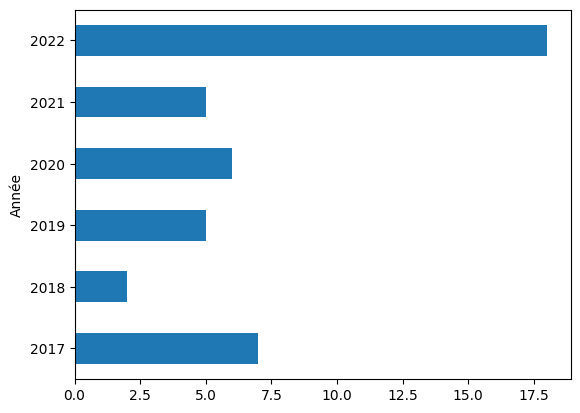

In [14]:
df_date[zero_indices].groupby("Année")["Ventes"].count().plot(kind="barh");

On les visualise très bien aussi !

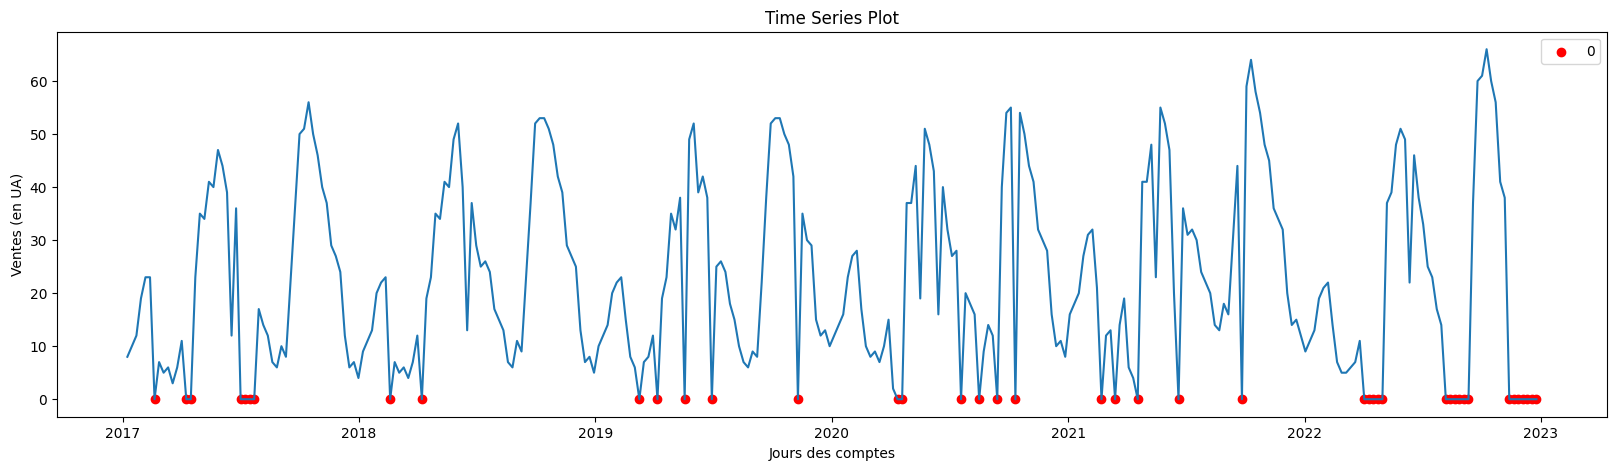

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(df_date["Dimanche"], df_date["Ventes"])
plt.scatter(df_date["Dimanche"][zero_indices], df_date["Ventes"][zero_indices], color='red', label="0")
plt.xlabel('Jours des comptes')
plt.ylabel('Ventes (en UA)')
plt.title('Time Series Plot')
plt.legend();

# Derniers ajustements

Convertir les formats dates en nombres simplifie les données pour le réseau de neurones. La capture des tendances temporelles lui devient alors plus facile.

In [16]:
dimanches = df_date.pop("Dimanche")
df_date["Delta"] = (dimanches - dimanches.min()).dt.days
df_date = df_date[['Ventes', 'Année', 'Delta']]
df_date.head()

,Ventes,Année,Delta
0,8.0,2017,0
1,10.0,2017,7
2,12.0,2017,14
3,19.0,2017,21
4,23.0,2017,28


Standardiser l'ensemble des données entre $0$ et $1$ accélére l'apprentissage et nous évite des problèmes de convergence tout en rendant le réseau indépendant de l'unité de mesure.

In [17]:
scaler = MinMaxScaler()
df_date.values[:] = scaler.fit_transform(df_date)
df_date

,Ventes,Année,Delta
0,8.0,2017,0
1,10.0,2017,7
2,12.0,2017,14
3,19.0,2017,21
4,23.0,2017,28
...,...,...,...
307,0.0,2022,2149
308,0.0,2022,2156
309,0.0,2022,2163
310,0.0,2022,2170


Mettons de côté les valeurs manquantes pour quand il viendra de les prédire.

In [18]:
df_pred = df_date[zero_indices]
df_fit = df_date[~zero_indices]

Isolons la variable cible des varialbes d'intérêt.

In [19]:
y = df_fit.iloc[:, 0]
X = df_fit.iloc[:, 1:]
X_pred = df_pred.iloc[:, 1:]

On peut à présent partionner nos données en un ensemble d'entraînement et un autre de test. Le premier alimente le modèle et le second nous permet de mesurer ses performances. Cela pour garantir sa capacité à généraliser sur de nouvelles données !

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Construction du modèle

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Construction
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(2,), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001, decay=0.001 / 200)
model.compile(optimizer=optimizer, loss='mse')

# Model Training
model.fit(X_train, y_train, epochs=50, batch_size=26, verbose=0)

# Model Evaluation
loss = model.evaluate(X_test, y_test, verbose=0)
print(loss)

# Making Predictions
y_pred = model.predict(X_pred)
df_date.loc[zero_indices, "Ventes"] = y_pred.flatten()
df_date.values[:] = scaler.inverse_transform(df_date)

2023-05-25 23:02:42.321645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-25 23:02:42.321905: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


246.6995086669922
2/2 [==============================] - 0s 2ms/step


# Construction du modèle

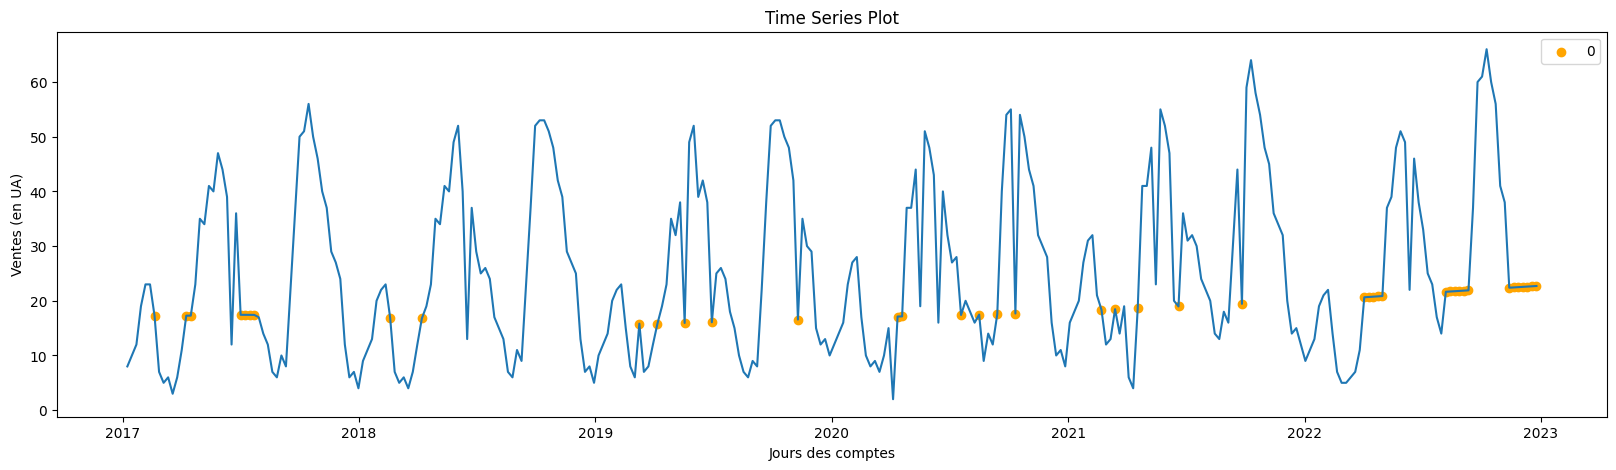

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(dimanches, df_date["Ventes"])
plt.scatter(dimanches[zero_indices], df_date["Ventes"][zero_indices], color='orange', label="0")
plt.xlabel('Jours des comptes')
plt.ylabel('Ventes (en UA)')
plt.title('Time Series Plot')
plt.legend();